# chatbot
- [reference] https://python.langchain.com/v0.2/docs/tutorials/chatbot/


# Quickstart

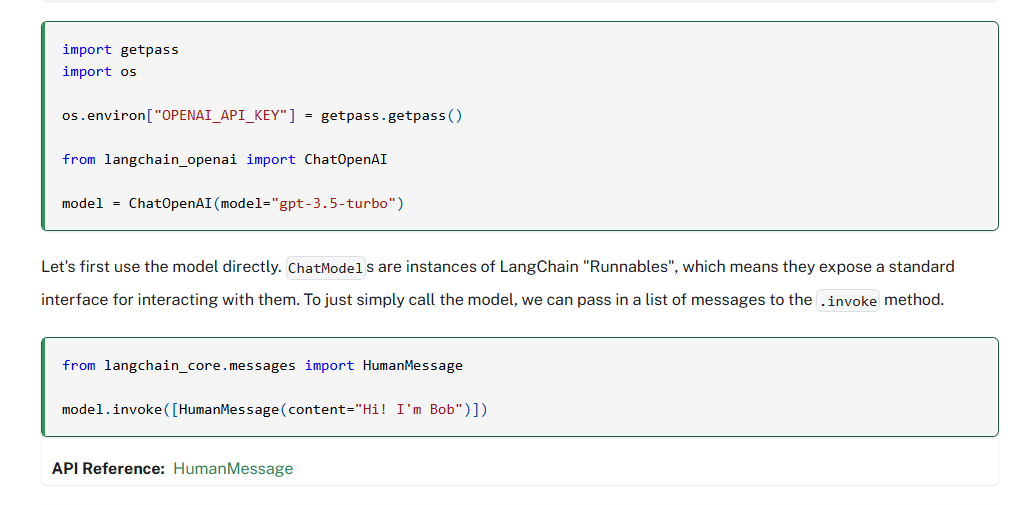

In [1]:
from langchain_openai import ChatOpenAI
from dotenv import load_dotenv
from langchain_core.messages import HumanMessage

In [2]:
load_dotenv()

True

In [3]:
llm = ChatOpenAI(
    model = 'gpt-4.1-nano',
)

In [4]:
ai_message = llm.invoke([HumanMessage(content="안녕 나는 홍길동이야")])

In [5]:
ai_message.content

'안녕 홍길동! 반가워요. 오늘 어떻게 도와줄까요?'

In [6]:
ai_message_02 = llm.invoke('내 이름이 뭐야?')
ai_message_02.content

'죄송하지만, 제가 당신의 이름을 알지 못합니다.'

In [7]:
ai_message_03 = llm.invoke([HumanMessage('내 이름이 뭐야?')])
ai_message_03.content

'죄송하지만, 저는 당신의 이름을 알지 못합니다. 만약 말씀해 주시면 기억해 둘 수 있습니다!'

In [8]:
from langchain_core.messages import AIMessage

llm.invoke([
    HumanMessage(content="안녕 나는 홍길동이야"),
    AIMessage(content='안녕하세요, 홍길동님! 만나서 반가워요. 어떻게 도와드릴까요?'),
    HumanMessage(content='내 이름이 뭐야?')
])

AIMessage(content='당신의 이름은 홍길동이세요!', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 11, 'prompt_tokens': 51, 'total_tokens': 62, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-nano-2025-04-14', 'system_fingerprint': 'fp_f12167b370', 'id': 'chatcmpl-BcMlHCridbbYKRXsTE3iH3mJDOcOL', 'finish_reason': 'stop', 'logprobs': None}, id='run-4ba42cdc-a729-40b3-a54f-9eb6e80d040a-0', usage_metadata={'input_tokens': 51, 'output_tokens': 11, 'total_tokens': 62, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

# Message History

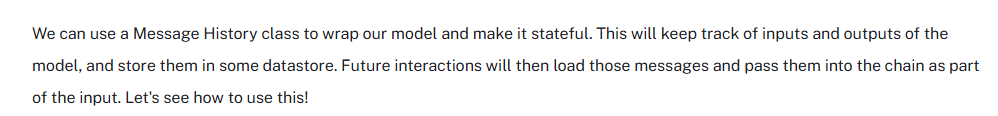

In [9]:
from langchain_core.chat_history import (
    BaseChatMessageHistory,
    InMemoryChatMessageHistory
)
from langchain_core.runnables.history import RunnableWithMessageHistory

store = {}

def get_session_history(session_id: str) -> BaseChatMessageHistory:
    if session_id not in store:
        store[session_id] = InMemoryChatMessageHistory()

    return store[session_id]

with_message_history = RunnableWithMessageHistory(llm, get_session_history)

In [10]:
config = {'configurable': {'session_id': 'abc2'}}

response = with_message_history.invoke(
    [HumanMessage(content="안녕 나는 홍길동이야")],
    config=config
)

response.content

'안녕하세요, 홍길동님! 어떻게 도와드릴까요?'

In [11]:
response = with_message_history.invoke(
    [HumanMessage(content='내 이름이 뭐야?')],
    config=config
)

response.content

'당신의 이름은 홍길동이세요!'

In [12]:
## 대화 이력
get_session_history('abc2').messages

[HumanMessage(content='안녕 나는 홍길동이야', additional_kwargs={}, response_metadata={}),
 AIMessage(content='안녕하세요, 홍길동님! 어떻게 도와드릴까요?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 15, 'prompt_tokens': 15, 'total_tokens': 30, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-nano-2025-04-14', 'system_fingerprint': 'fp_f12167b370', 'id': 'chatcmpl-BcMlIgUyHMvOwMtdT86EiXlBCTvsW', 'finish_reason': 'stop', 'logprobs': None}, id='run-8933bf99-403b-45cb-ab62-9757ea3d82cb-0', usage_metadata={'input_tokens': 15, 'output_tokens': 15, 'total_tokens': 30, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}),
 HumanMessage(content='내 이름이 뭐야?', additional_kwargs={}, response_metadata={}),
 AIMessage(content='당신의 이름은 홍길동이세요!', a

In [13]:
config = {"configurable": {"session_id": "abc3"}}

In [14]:
get_session_history('abc3')

InMemoryChatMessageHistory(messages=[])

In [15]:
response = with_message_history.invoke(
    [HumanMessage(content="내 이름이 뭐야?")],
    config=config,
)

response.content

'죄송하지만, 저는 당신의 이름을 알지 못해요. 이름을 말씀해 주시면 기억해 둘게요!'

In [16]:
for message in get_session_history('abc3').messages:
    print(message.content)

내 이름이 뭐야?
죄송하지만, 저는 당신의 이름을 알지 못해요. 이름을 말씀해 주시면 기억해 둘게요!


In [17]:
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder

prompt = ChatPromptTemplate.from_messages(
     [(
        "system", "You are a helpful assistant. Answer all questions to the best of your ability.",),
        MessagesPlaceholder(variable_name="messages"),
    ]
)

chain = prompt | llm

In [18]:
response = chain.invoke({'messages': [HumanMessage(content="hi! I'm bob")]})
response

AIMessage(content='Hello, Bob! Nice to meet you. How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 16, 'prompt_tokens': 31, 'total_tokens': 47, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-nano-2025-04-14', 'system_fingerprint': 'fp_f12167b370', 'id': 'chatcmpl-BcMlKgbqNJq5iNuaAj9MeftBZfwyG', 'finish_reason': 'stop', 'logprobs': None}, id='run-a422d0c1-c485-4a39-b958-01fd89f868ae-0', usage_metadata={'input_tokens': 31, 'output_tokens': 16, 'total_tokens': 47, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [19]:
with_message_history = RunnableWithMessageHistory(chain, get_session_history)

config = {"configurable": {"session_id":"abc5"}}

response = with_message_history.invoke(
    [HumanMessage(content="Hi! I'm Jin")],
    config=config
)

response.content

'Hi Jin! Nice to meet you. How can I assist you today?'

In [20]:
len(store)

3

In [21]:
store.keys()

dict_keys(['abc2', 'abc3', 'abc5'])

In [22]:
get_session_history('abc5')

InMemoryChatMessageHistory(messages=[HumanMessage(content="Hi! I'm Jin", additional_kwargs={}, response_metadata={}), AIMessage(content='Hi Jin! Nice to meet you. How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 15, 'prompt_tokens': 31, 'total_tokens': 46, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-nano-2025-04-14', 'system_fingerprint': 'fp_9970320b4a', 'id': 'chatcmpl-BcMlLDtsAkrjUzaYWpcKtYpy3rB6B', 'finish_reason': 'stop', 'logprobs': None}, id='run-97a979ef-46b8-49a8-872f-2b5c19f1a1b4-0', usage_metadata={'input_tokens': 31, 'output_tokens': 15, 'total_tokens': 46, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})])

In [23]:
response = with_message_history.invoke(
    [HumanMessage(content="What's my name?")],
    config=config,
)

response.content

'Your name is Jin. Nice to meet you again! How can I help you today?'

In [24]:
for message in get_session_history('abc5').messages:
    print(f'[{message.type.upper()}]: {message.content}')

[HUMAN]: Hi! I'm Jin
[AI]: Hi Jin! Nice to meet you. How can I assist you today?
[HUMAN]: What's my name?
[AI]: Your name is Jin. Nice to meet you again! How can I help you today?


In [25]:
get_session_history('abc5').messages

[HumanMessage(content="Hi! I'm Jin", additional_kwargs={}, response_metadata={}),
 AIMessage(content='Hi Jin! Nice to meet you. How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 15, 'prompt_tokens': 31, 'total_tokens': 46, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-nano-2025-04-14', 'system_fingerprint': 'fp_9970320b4a', 'id': 'chatcmpl-BcMlLDtsAkrjUzaYWpcKtYpy3rB6B', 'finish_reason': 'stop', 'logprobs': None}, id='run-97a979ef-46b8-49a8-872f-2b5c19f1a1b4-0', usage_metadata={'input_tokens': 31, 'output_tokens': 15, 'total_tokens': 46, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}),
 HumanMessage(content="What's my name?", additional_kwargs={}, response_metadata={}),
 AIM

In [26]:
get_session_history('abc5').messages[0]

HumanMessage(content="Hi! I'm Jin", additional_kwargs={}, response_metadata={})

In [27]:
get_session_history('abc5').messages[0].type

'human'

In [28]:
prompt = ChatPromptTemplate.from_messages([
    ('system', 'You are a helpful assistant. Answer all quesrions to the best of your ability in {language}.'),
    MessagesPlaceholder(variable_name="messages")
])

chain = prompt | llm

In [29]:
response = chain.invoke(
    {"messages": [HumanMessage(content="hi! I'm bob")], "language": "Spanish"}
)

response.content

'¡Hola, Bob! Mucho gusto, ¿en qué puedo ayudarte hoy?'

In [30]:
with_message_history = RunnableWithMessageHistory(
    chain, 
    get_session_history,  # 불러놓고 사용안함
    input_messages_key="messages",
)

config = {"configurable": {"session_id": "abc11"}}

response = with_message_history.invoke(
    {"messages": [HumanMessage(content="hi! I'm todd")], "language": "Spanish"},
    config= config
)

response.content

'¡Hola, Todd! Mucho gusto. ¿En qué puedo ayudarte hoy?'

In [31]:
get_session_history('abc11')

InMemoryChatMessageHistory(messages=[HumanMessage(content="hi! I'm todd", additional_kwargs={}, response_metadata={}), AIMessage(content='¡Hola, Todd! Mucho gusto. ¿En qué puedo ayudarte hoy?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 16, 'prompt_tokens': 35, 'total_tokens': 51, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-nano-2025-04-14', 'system_fingerprint': 'fp_38343a2f8f', 'id': 'chatcmpl-BcMlNXMqhXfrGqLH4wfN9b49myaBr', 'finish_reason': 'stop', 'logprobs': None}, id='run-06c32db4-2b03-4206-bc9b-7219f20bc40d-0', usage_metadata={'input_tokens': 35, 'output_tokens': 16, 'total_tokens': 51, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})])

In [32]:
response = with_message_history.invoke(
    {"messages": [HumanMessage(content="Whats my name?")], "language": "Spanish"},
    config=config
)

response.content

'Tu nombre es Todd.'

In [33]:
get_session_history('abc11').messages

[HumanMessage(content="hi! I'm todd", additional_kwargs={}, response_metadata={}),
 AIMessage(content='¡Hola, Todd! Mucho gusto. ¿En qué puedo ayudarte hoy?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 16, 'prompt_tokens': 35, 'total_tokens': 51, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-nano-2025-04-14', 'system_fingerprint': 'fp_38343a2f8f', 'id': 'chatcmpl-BcMlNXMqhXfrGqLH4wfN9b49myaBr', 'finish_reason': 'stop', 'logprobs': None}, id='run-06c32db4-2b03-4206-bc9b-7219f20bc40d-0', usage_metadata={'input_tokens': 35, 'output_tokens': 16, 'total_tokens': 51, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}),
 HumanMessage(content='Whats my name?', additional_kwargs={}, response_metadata={}),
 AIM

In [34]:
for info in get_session_history('abc11').messages:
    print(f'{[info.type.upper()]}: {info.content}')

['HUMAN']: hi! I'm todd
['AI']: ¡Hola, Todd! Mucho gusto. ¿En qué puedo ayudarte hoy?
['HUMAN']: Whats my name?
['AI']: Tu nombre es Todd.


# Managing Conversation History

In [54]:
from langchain_core.messages import SystemMessage, HumanMessage, AIMessage, trim_messages


model = ChatOpenAI( model='gpt-4o')

trimmer = trim_messages(
    max_tokens = 65,
    strategy = 'last',
    token_counter = model,
    include_system = False,
    allow_partial = True,
    start_on = "human",
)

messages = [
    SystemMessage(content="you're a good assistant"),
    HumanMessage(content="hi! I'm bob"),
    AIMessage(content="hi!"),
    HumanMessage(content="I like vanilla ice cream"),
    AIMessage(content="nice"),
    HumanMessage(content="whats 2 + 2"),
    AIMessage(content="4"),
    HumanMessage(content="thanks"),
    AIMessage(content="no problem!"),
    HumanMessage(content="having fun?"),
    AIMessage(content="yes!"),
]

trimmer.invoke(messages)


[HumanMessage(content='I like vanilla ice cream', additional_kwargs={}, response_metadata={}),
 AIMessage(content='nice', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='whats 2 + 2', additional_kwargs={}, response_metadata={}),
 AIMessage(content='4', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='thanks', additional_kwargs={}, response_metadata={}),
 AIMessage(content='no problem!', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='having fun?', additional_kwargs={}, response_metadata={}),
 AIMessage(content='yes!', additional_kwargs={}, response_metadata={})]

In [59]:
from langchain_core.messages import SystemMessage, HumanMessage, AIMessage, trim_messages


model = ChatOpenAI( model='gpt-4o')

trimmer = trim_messages(
    max_tokens = 65,
    strategy = 'last',
    token_counter = model,
    include_system = True,
    allow_partial = True,
    start_on = "human",
)

messages = [
    SystemMessage(content="you're a good assistant"),
    HumanMessage(content="hi! I'm bob"),
    AIMessage(content="hi!"),
    HumanMessage(content="I like vanilla ice cream"),
    AIMessage(content="nice"),
    HumanMessage(content="whats 2 + 2"),
    AIMessage(content="4"),
    HumanMessage(content="thanks"),
    AIMessage(content="no problem!"),
    HumanMessage(content="having fun?"),
    AIMessage(content="yes!"),
]

trim_messages = trimmer.invoke(messages)
trim_messages

[SystemMessage(content="you're a good assistant", additional_kwargs={}, response_metadata={}),
 HumanMessage(content='whats 2 + 2', additional_kwargs={}, response_metadata={}),
 AIMessage(content='4', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='thanks', additional_kwargs={}, response_metadata={}),
 AIMessage(content='no problem!', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='having fun?', additional_kwargs={}, response_metadata={}),
 AIMessage(content='yes!', additional_kwargs={}, response_metadata={})]

In [60]:
model.get_num_tokens_from_messages(trim_messages)

52

In [68]:
from operator import itemgetter


dc =     {
        "messages" : messages + [HumanMessage(content="what's my name?")],
        "language" : "한국어"
    }

# result = itemgetter("messages")
# result(dc)

itemgetter("messages")(dc)

[SystemMessage(content="you're a good assistant", additional_kwargs={}, response_metadata={}),
 HumanMessage(content="hi! I'm bob", additional_kwargs={}, response_metadata={}),
 AIMessage(content='hi!', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='I like vanilla ice cream', additional_kwargs={}, response_metadata={}),
 AIMessage(content='nice', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='whats 2 + 2', additional_kwargs={}, response_metadata={}),
 AIMessage(content='4', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='thanks', additional_kwargs={}, response_metadata={}),
 AIMessage(content='no problem!', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='having fun?', additional_kwargs={}, response_metadata={}),
 AIMessage(content='yes!', additional_kwargs={}, response_metadata={}),
 HumanMessage(content="what's my name?", additional_kwargs={}, response_metadata={})]

In [72]:
from operator import itemgetter

from langchain_core.runnables import RunnablePassthrough

chain = (
    RunnablePassthrough.assign(messages=itemgetter("messages") | trimmer)  
    | prompt
    | model
)

response = chain.invoke(
    {
        "messages" : messages + [HumanMessage(content="what's my name?")],
        "language" : "한국어"
    }
)

response.content

'죄송하지만, 대화에서 사용자의 이름을 말씀해 주시지 않았습니다. 제게 알려주시면 기억하도록 하겠습니다.'

In [69]:
current_messages = messages + [HumanMessage(content="what's my name?")]
trimmer.invoke(current_messages)

[SystemMessage(content="you're a good assistant", additional_kwargs={}, response_metadata={}),
 HumanMessage(content='whats 2 + 2', additional_kwargs={}, response_metadata={}),
 AIMessage(content='4', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='thanks', additional_kwargs={}, response_metadata={}),
 AIMessage(content='no problem!', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='having fun?', additional_kwargs={}, response_metadata={}),
 AIMessage(content='yes!', additional_kwargs={}, response_metadata={}),
 HumanMessage(content="what's my name?", additional_kwargs={}, response_metadata={})]

In [74]:
response.usage_metadata

{'input_tokens': 86,
 'output_tokens': 29,
 'total_tokens': 115,
 'input_token_details': {'audio': 0, 'cache_read': 0},
 'output_token_details': {'audio': 0, 'reasoning': 0}}

In [75]:
response.usage_metadata['total_tokens']

115

In [80]:
response = chain.invoke({
    "messages" : messages + [HumanMessage(content="내 이름은 뭐야?")],
     "language": "한국어",
})

response.content

'죄송하지만, 당신의 이름은 제 데이터에 포함되어 있지 않습니다. 어떻게 불리고 싶으신지 말씀해 주시면 그렇게 불러 드리겠습니다.'

In [78]:
store.keys()

dict_keys(['abc2', 'abc3', 'abc5', 'abc11'])

In [81]:
with_message_history = RunnableWithMessageHistory(
    chain,
    get_session_history,
    input_messages_key="messages",
)

config = {"configurable": {"session_id": "abc20"}}

response = with_message_history.invoke(
    {
        "messages": messages + [HumanMessage(content="내 이름이 뭐야?")],
        "language": "한국어",
    },
    config=config,
)

response.content

'죄송하지만, 당신의 이름은 알 수 없습니다. 대화에서 이름을 말씀해 주시면 기억해 드리겠습니다.'

In [82]:
get_session_history('abc20')

InMemoryChatMessageHistory(messages=[SystemMessage(content="you're a good assistant", additional_kwargs={}, response_metadata={}), HumanMessage(content="hi! I'm bob", additional_kwargs={}, response_metadata={}), AIMessage(content='hi!', additional_kwargs={}, response_metadata={}), HumanMessage(content='I like vanilla ice cream', additional_kwargs={}, response_metadata={}), AIMessage(content='nice', additional_kwargs={}, response_metadata={}), HumanMessage(content='whats 2 + 2', additional_kwargs={}, response_metadata={}), AIMessage(content='4', additional_kwargs={}, response_metadata={}), HumanMessage(content='thanks', additional_kwargs={}, response_metadata={}), AIMessage(content='no problem!', additional_kwargs={}, response_metadata={}), HumanMessage(content='having fun?', additional_kwargs={}, response_metadata={}), AIMessage(content='yes!', additional_kwargs={}, response_metadata={}), HumanMessage(content='내 이름이 뭐야?', additional_kwargs={}, response_metadata={}), AIMessage(content='

In [83]:
for message in get_session_history('abc20').messages:
    print(f'[{message.type.upper()}]: {message.content}')

[SYSTEM]: you're a good assistant
[HUMAN]: hi! I'm bob
[AI]: hi!
[HUMAN]: I like vanilla ice cream
[AI]: nice
[HUMAN]: whats 2 + 2
[AI]: 4
[HUMAN]: thanks
[AI]: no problem!
[HUMAN]: having fun?
[AI]: yes!
[HUMAN]: 내 이름이 뭐야?
[AI]: 죄송하지만, 당신의 이름은 알 수 없습니다. 대화에서 이름을 말씀해 주시면 기억해 드리겠습니다.


In [85]:
response = with_message_history.invoke(
    {
        "messages": [HumanMessage(content="what math problem did i ask?")],
        "language": "한국어",
    },
    config=config,
)

response.content

'죄송하지만 이전에 어떤 수학 문제를 물어보셨는지에 대한 정보를 모르고 있습니다. 새로운 수학 문제나 궁금한 점이 있으면 말씀해 주세요. 기꺼이 도와드리겠습니다! '

In [88]:
get_session_history('abc20').messages

[SystemMessage(content="you're a good assistant", additional_kwargs={}, response_metadata={}),
 HumanMessage(content="hi! I'm bob", additional_kwargs={}, response_metadata={}),
 AIMessage(content='hi!', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='I like vanilla ice cream', additional_kwargs={}, response_metadata={}),
 AIMessage(content='nice', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='whats 2 + 2', additional_kwargs={}, response_metadata={}),
 AIMessage(content='4', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='thanks', additional_kwargs={}, response_metadata={}),
 AIMessage(content='no problem!', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='having fun?', additional_kwargs={}, response_metadata={}),
 AIMessage(content='yes!', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='내 이름이 뭐야?', additional_kwargs={}, response_metadata={}),
 AIMessage(content='죄송하지만, 당신의 이름은 알 수 없습니다.